# **1. Import Library**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/viapiyaaa/bank_transaction_data/refs/heads/main/hasil_clustering.csv')
df.head()

,TransactionAmount,TransactionDuration,LoginAttempts,TransactionType_Debit,Channel_Branch,Channel_Online,Cluster
0,14.09,81,1,True,False,False,1
1,376.24,141,1,True,False,False,1
2,126.29,56,1,True,False,True,2
3,184.50,25,1,True,False,True,2
4,13.45,198,1,False,False,True,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [29]:
X = df.drop(columns=['Cluster'])  # Pastikan target 'Cluster' tidak termasuk di X
y = df['Cluster']  # Target

# Pembagian data menjadi training dan testing (misalnya 70% untuk pelatihan dan 30% untuk pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [30]:
# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

**Algoritma K-Nearest Neighbors (KNN)**

In [31]:
# Membangun model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Kamu bisa coba ganti jumlah tetangga

# Melatih model dengan data training
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

**Algoritma Support Vector Machine (SVM)**

In [32]:
# Membangun model SVM dengan kernel RBF
model = SVC(kernel='rbf', random_state=42, class_weight='balanced')

# Melatih model dengan data training
model.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

**Evaluasi Algoritma K-Nearest Neighbors (KNN)**

In [33]:
y_pred = knn_model.predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Evaluasi Model K-Nearest Neighbors (KNN):")
print(f"- Akurasi: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1-Score: {f1:.2f}")

Evaluasi Model K-Nearest Neighbors (KNN):
- Akurasi: 0.37
- Precision: 0.13
- Recall: 0.37
- F1-Score: 0.20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Evaluasi Model
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1", "Class 2"]))

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.37      1.00      0.54       277
     Class 1       0.00      0.00      0.00       246
     Class 2       0.00      0.00      0.00       231

    accuracy                           0.37       754
   macro avg       0.12      0.33      0.18       754
weighted avg       0.13      0.37      0.20       754



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


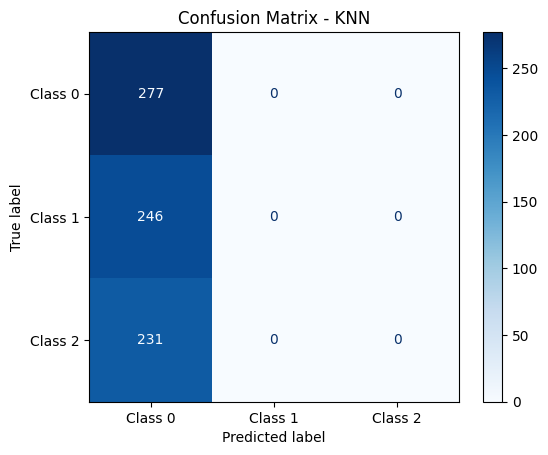

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

**Evaluasi Algoritma Support Vector Machine (SVM)**

In [36]:
y_pred = model.predict(X_test_scaled)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Evaluasi Model Support Vector Machine (SVM):")
print(f"- Akurasi: {accuracy:.2f}")
print(f"- Precision: {precision:.2f}")
print(f"- Recall: {recall:.2f}")
print(f"- F1-Score: {f1:.2f}")

Evaluasi Model Support Vector Machine (SVM):
- Akurasi: 1.00
- Precision: 1.00
- Recall: 1.00
- F1-Score: 1.00


In [37]:
# Evaluasi Model
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2']))

Classification Report:

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       277
     Class 1       1.00      1.00      1.00       246
     Class 2       1.00      1.00      1.00       231

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754



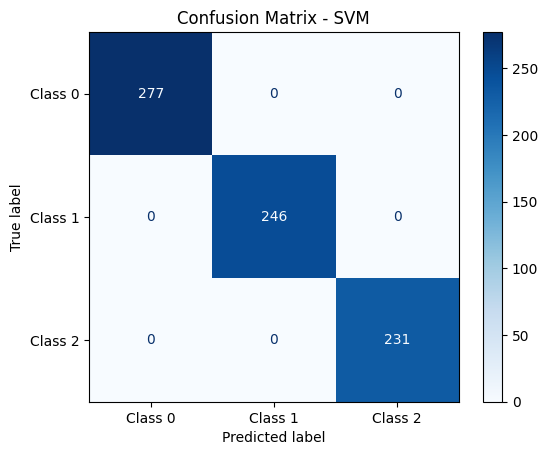

In [38]:
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Tampilkan
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1", "Class 2"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [39]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [40]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**K-Nearest Neighbors (KNN)**: Model KNN menunjukkan hasil yang sangat buruk, dengan precision dan recall hanya tinggi untuk Class 0 (precision 0.37, recall 1.00), sementara Class 1 dan 2 gagal terdeteksi sama sekali (precision dan recall 0.00). Ini berarti model hanya mampu mengenali satu kelas dan mengabaikan dua kelas lainnya, yang menunjukkan ketidakseimbangan klasifikasi yang sangat parah, serta kemungkinan model hanya "menghafal" kelas mayoritas (overfitting pada Class 0).

**Support Vector Machine (SVM)**: SVM pada kasus ini justru menunjukkan performa yang terlalu sempurna (semua metrik = 1.00). Ini bisa jadi indikasi kuat overfitting, mungkin model hanya mempelajari label target dari clustering tanpa benar-benar mengenali pola dari fitur.